In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as ddf
import psutil

In [2]:
df = pd.read_csv('spneodeath_clean.csv')
df.describe()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
count,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,...,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06
mean,1.012354e+00,2.823321e+01,2.090997e+00,4.216266e+00,8.275971e-01,2.395071e-01,4.879380e+00,1.029510e+00,1.567570e+00,3.723224e+00,...,2.271142e+00,1.058415e+00,5.264887e-01,3.196121e-01,3.833380e+01,1.046613e+00,1.208808e+00,3.905048e+00,3.953085e+00,6.127716e-03
std,1.542648e-01,6.687282e+00,1.375772e+00,6.304390e-01,1.104993e+00,5.728221e-01,4.320864e-01,1.747430e-01,4.954134e-01,5.798743e-01,...,1.432523e+00,1.306026e+00,1.030181e+00,6.354840e-01,2.111963e+00,2.206736e-01,4.253384e-01,1.445278e+00,2.616306e+00,7.803955e-02
min,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.300000e+01,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,1.000000e+00,2.800000e+01,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00
75%,1.000000e+00,3.300000e+01,2.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.000000e+01,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00
max,4.000000e+00,6.300000e+01,9.000000e+00,9.000000e+00,1.800000e+01,1.900000e+01,6.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,...,5.000000e+00,3.900000e+01,8.000000e+01,8.000000e+01,4.600000e+01,3.000000e+00,4.000000e+00,5.000000e+00,1.100000e+01,1.000000e+00


In [3]:
df.head()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
0,1,32,2.0,4.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0,1,39,1.0,1.0,5.0,5.0,0
1,1,40,1.0,3.0,4,1,5.0,1.0,2.0,4,...,4.0,5,4,0,40,2.0,1.0,5.0,7.0,0
2,1,31,2.0,5.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0,1,39,1.0,1.0,2.0,5.0,0
3,1,19,5.0,4.0,2,0,5.0,1.0,1.0,4,...,4.0,2,2,0,39,1.0,1.0,5.0,4.0,0
4,1,33,1.0,4.0,5,0,5.0,1.0,1.0,2,...,2.0,5,5,0,40,1.0,2.0,2.0,3.0,0


Class 0: 1269322
Class 1: 7826
Proportion: 162.19 : 1


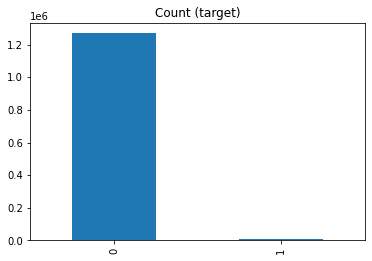

In [4]:
target_count = df.neonatal_death.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [5]:
df.isnull().sum()

tp_birth_place                 0
maternal_age                   0
tp_marital_status              0
tp_maternal_education_years    0
num_live_births                0
num_fetal_losses               0
tp_pregnancy_duration          0
tp_pregnancy                   0
tp_labor                       0
tp_prenatal_appointments       0
cd_apgar1                      0
cd_apgar5                      0
newborn_weight                 0
has_congenital_malformation    0
tp_maternal_skin_color         0
num_gestations                 0
num_normal_labors              0
num_cesarean_labors            0
num_gestational_weeks          0
tp_presentation_newborn        0
tp_childbirth_assistance       0
tp_fill_form_responsible       0
cd_robson_group                0
neonatal_death                 0
dtype: int64

In [6]:
# Class count
count_class_0, count_class_1 = df.neonatal_death.value_counts()

# Divide by class
df_class_0 = df[df['neonatal_death'] == 0]
df_class_1 = df[df['neonatal_death'] == 1]

In [7]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.neonatal_death.value_counts())

Random under-sampling:
0    7826
1    7826
Name: neonatal_death, dtype: int64


In [8]:
X = df.drop('neonatal_death',axis='columns')
y = df['neonatal_death']

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    1269322
1    1269322
Name: neonatal_death, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [11]:
# Number of classes in training Data
y_train.value_counts()

1    1015458
0    1015457
Name: neonatal_death, dtype: int64

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7, eval_metric='mlogloss')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

C:\Users\Pallab\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Pallab\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Pallab\AppData\Local\Pr

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

In [ ]:
# Making the confusion matrix and calculating the accuracy score
mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)